# IRIS数据集实践IPCA（Incremental  PCA）

IRIS数据集实践IPCA鸢尾花数据集，是一类多重变量分析的数据集。数据集包含150个数据集，分为三类，每类50个数据，每个数据包含4个特征。

可以通过花萼长度，花萼宽度，花瓣长度，花瓣宽度（sepal length，sepal width ，petal length ，petal width ）4个特征预测鸢尾花卉属于：Setosa，Versicolour，Virginica，三个种类中的哪一类。

In [51]:
#_*_coding:utf-8_*_
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
 
data = datasets.load_iris()

In [52]:
print(data.feature_names)
print(data.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [53]:
data.data[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [42]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

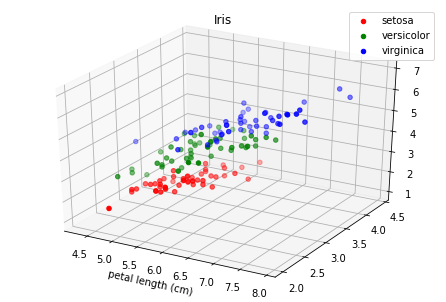

In [43]:
X =data['data']
y =data['target']
ax = Axes3D(plt.figure())
for color, i, target_name in zip('rgb', [0, 1, 2], data.target_names):
    ax.scatter(X[y==i, 0],X[y==i, 1], X[y==i, 2], c=color, label=target_name)

ax.set_xlabel(data.feature_names[0])
ax.set_xlabel(data.feature_names[1])
ax.set_xlabel(data.feature_names[2])
ax.set_title('Iris')
plt.legend()
plt.show()

# 选取两个特征查看数据分布情况

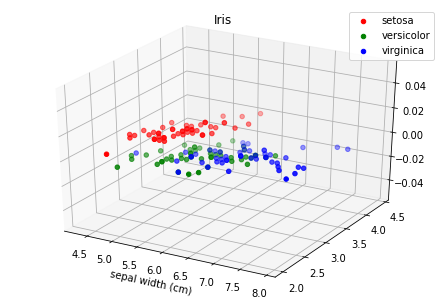

In [44]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
 
data = datasets.load_iris()
X =data['data']
y =data['target']
ax = Axes3D(plt.figure())
for c, i, target_name in zip('rgb', [0, 1, 2], data.target_names):
    ax.scatter(X[y==i, 0], X[y==i, 1], c=c, label=target_name)

ax.set_xlabel(data.feature_names[0])
ax.set_xlabel(data.feature_names[1])
ax.set_title('Iris')
plt.legend()
plt.show()

# 利用PCA降维，降到二维

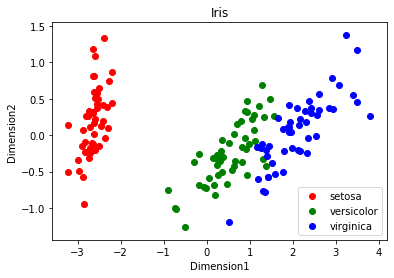

In [45]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
 
data = datasets.load_iris()
X =data['data']
y =data['target']
pca = PCA(n_components=2)
X_p = pca.fit(X).transform(X)
ax = plt.figure()
for c, i, target_name in zip('rgb', [0, 1, 2], data.target_names):
    plt.scatter(X_p[y==i, 0], X_p[y==i, 1], c=c, label=target_name)

plt.xlabel('Dimension1')
plt.ylabel('Dimension2')
plt.title('Iris')
plt.legend()

三种iris仍然清晰可见。

# Incremental PCA 
当要分解的数据集太大而无法放入内存时，增量主成分分析（IPCA）通常用作主成分分析（PCA）的替代。IPCA主要是为了解决单机内存限制的，有时候我们的样本量可能是上百万+，维度可能也是上千，直接去拟合数据可能会让内存爆掉，此时我们可以使用Incremental PCA类来解决这个问题。

IPCA 是将数据分成多个batch，然后对每个batch依次递增调用partial_fit函数，这样一步步的得到最终的样本最优降维。

此处示例用作视觉检查，IPCA能够找到类似的数据投影到PCA，而一次只处理几个样本。还可以被视为“玩具示例”。

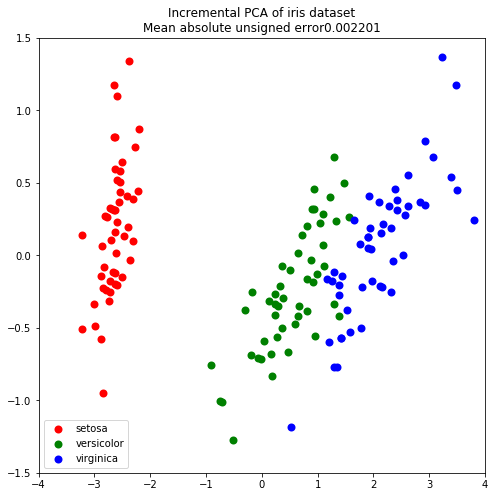

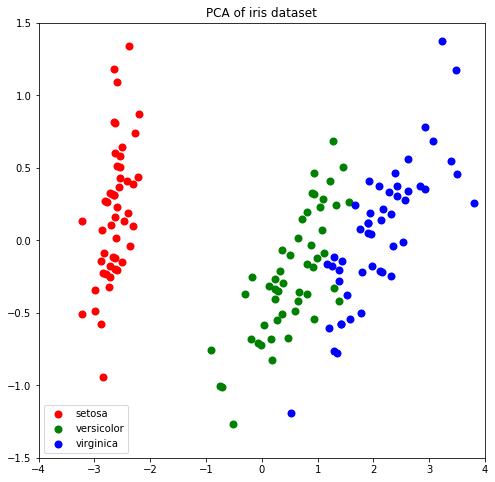

In [50]:
import numpy as np
import matplotlib.pyplot as plt
 
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA , IncrementalPCA
 
iris = load_iris()
X = iris.data
y = iris.target
 
n_components = 2
ipca = IncrementalPCA(n_components=n_components, batch_size=10)
X_ipca = ipca.fit_transform(X)
 
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)
 
colors = ['red', 'green', 'blue']
 
for X_trainsformed, title in [(X_ipca, "Incremental PCA"), (X_pca, "PCA")]:
    plt.figure(figsize=(8, 8))
    for color, i ,target_name in zip(colors, [0,1,2], iris.target_names):
        plt.scatter(X_trainsformed[y == i, 0], X_trainsformed[y ==i, 1],
                    color=color, lw=2, label=target_name)
 
    if "Incremental" in title:
        err = np.abs(np.abs(X_pca) - np.abs(X_ipca)).mean()
        plt.title(title + ' of iris dataset\nMean absolute unsigned error%.6f'%err)
    else:
        plt.title(title + ' of iris dataset')
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.axis([-4, 4, -1.5, 1.5])

plt.show()